# Longevity Analysis
In this notebook, we try to analyse what makes a character succeed.

In [248]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math
import re
import string
import pickle
from collections import Counter

Load the dataset

In [249]:
marvel_pers = pd.read_pickle("marvel_pers_final.txt")
dc_pers = pd.read_pickle("dc_pers_final.txt")


In [250]:
def clean_years(l):
    if l is None:
        new_l = []
    else:
        new_l = [year for year in l if year>1930]
        
    return new_l
    
dc_pers['years'] = dc_pers['years'].apply(clean_years)
marvel_pers['years'] = marvel_pers['years'].apply(clean_years)
dc_pers['years']
dc_pers['First_apparition'] = dc_pers['years'].apply(lambda x: min(x) if len(x)!=0 else None)    
marvel_pers['First_apparition'] = marvel_pers['years'].apply(lambda x: min(x) if len(x)!=0 else None)   

Find the longevity of each character, i.e. the number of year it appears

In [251]:
marvel_pers['Longevity'] = marvel_pers['years'].apply(lambda years: len(list(set(years))))
dc_pers['Longevity'] = dc_pers['years'].apply(lambda years: len(list(set(years))))

Let's remove characters that don't appear at all in comics

In [252]:
marvel_pers.drop(index = pers[marvel_pers['Longevity']==0].index,inplace=True)
dc_pers.drop(index = dc_pers[dc_pers['Longevity']==0].index,inplace=True)

/Users/jordanmetz/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [253]:
marvel_pers.head(10)

URL                      Real Name  \
0  /wiki/Aaron_the_Aakon_(Earth-616)                          Aaron   
1              /wiki/2-D_(Earth-616)  Darell (full name unrevealed)   
2  /wiki/Abraham_Erskine_(Earth-616)                Abraham Erskine   
3          /wiki/11-Ball_(Earth-616)                        Unknown   
4          /wiki/Abraham_(Earth-616)                        Abraham   
5           /wiki/Abarac_(Earth-616)                         Abarac   
6      /wiki/Abdul_Faoul_(Earth-616)          Professor Abdul Faoul   
7  /wiki/A.C._O%27Connor_(Earth-616)                 A. C. O'Connor   
8             /wiki/7-X9_(Earth-616)                        Unknown   
9              /wiki/803_(Earth-616)                            803   

                        Identity         Current Alias       Citizenship  \
0                Secret Identity               Unknown             Aakon   
1                Secret Identity                   2-D          American   
2  Known to Authorities Identity  Dr. Joseph Reinstein  German, American   
3                Secret Identity               11-Ball          American   
4               No Dual Identity               Unknown           Unknown   
5               No Dual Identity               Unknown         Cybernian   
6                Secret Identity        Scarlet Scarab          Egyptian   
7               No Dual Identity          Ace O'Connor          American   
8               No Dual Identity                  7-X9           Unknown   
9               No Dual Identity               Unknown           Unknown   

  Marital Status                              Occupation  \
0         Single                            Slave trader   
1         Single                              Adventurer   
2        Married                               Scientist   
3         Single  Professional criminal; former henchman   
4        Married                                 Prophet   
5         Single                 Court magician, advisor   
6         Single                Archeologist, adventurer   
7         Single                              Journalist   
8        Unknown                                 Unknown   
9         Single                                 Unknown   

                 Education   Gender          Height  ... Good_count Bad_count  \
0                  Unknown     Male         Unknown  ...          0         0   
1                  Unknown     Male         Unknown  ...          4         0   
2  Advanced College Degree     Male  5' 6" (1.68 m)  ...         40         1   
3                  Unknown     Male         Unknown  ...          0         1   
4                  Unknown     Male         Unknown  ...          1         0   
5                  Unknown     Male         Unknown  ...          1         0   
6                  Unknown     Male         Unknown  ...          0         4   
7                  Unknown   Female         Unknown  ...          0         0   
8                  Unknown     Male         Unknown  ...          0         1   
9                  Unknown  Agender         Unknown  ...         14         0   

  Neutral_count                                              Dates Behavior  \
0             0                                                 []     Good   
1             0  [January, 2008, July, 2011, September, 2011, J...     Good   
2            50  [March, 1941, November, 1946, March, 1965, Jan...  Neutral   
3             0                                       [July, 1991]      Bad   
4             6  [December, 1953, February, 1954, December, 195...  Neutral   
5             0                                   [November, 1970]     Good   
6             3  [December, 1977, February, 1978, June, 2014, J...      Bad   
7             5  [September, 1980, October, 1980, December, 198...  Neutral   
8             0                                      [March, 2016]      Bad   
9             1  [February, 2016, January, 2016, March, 2016, A...     

Discover the most famous character that are good and bad

In [254]:
#20 most appearance at MARVEL
appear_20 = marvel_pers.sort_values('Number_of_apparitions',ascending=False).head(10)[['Real Name','Current Alias']]
appear_20

Real Name     Current Alias
20183          Peter Benjamin Parker        Spider-Man
24326          Steven "Steve" Rogers   Captain America
1290     Anthony Edward "Tony" Stark          Iron Man
11709                  James Howlett         Wolverine
25251                   Thor Odinson   All-Father Thor
3444             Robert Bruce Banner              Hulk
21335                  Reed Richards  Mister Fantastic
2576      Benjamin Jacob "Ben" Grimm         The Thing
22813                  Scott Summers           Cyclops
10461  Dr. Henry "Hank" Philip McCoy             Beast

In [255]:
#20 most longevity at MARVEL
long_20 = marvel_pers.sort_values('Longevity',ascending=False).head(10)[['Real Name','Current Alias']]
long_20

Real Name     Current Alias
18466              Namor McKenzie       Sub-Mariner
10948             The Human Torch       Human Torch
24326       Steven "Steve" Rogers   Captain America
19762     Patricia "Patsy" Walker           Hellcat
319                  Adolf Hitler           Unknown
11781       James Buchanan Barnes    Winter Soldier
15373              Loki Laufeyson           Unknown
12750               Johann Shmidt         Red Skull
2576   Benjamin Jacob "Ben" Grimm         The Thing
21335               Reed Richards  Mister Fantastic

In [256]:
#both longevity and nb appearance
pd.merge(appear_20,long_20)

Real Name     Current Alias
0       Steven "Steve" Rogers   Captain America
1               Reed Richards  Mister Fantastic
2  Benjamin Jacob "Ben" Grimm         The Thing

***We can see that only 3 characters are in the top 20 in number of appearance and in longevity. Maybe we need to define the "famousity" of a character. The famousity will be defined as the harmonic mean between the appearance and the longevity.***

In [257]:
marvel_pers['Longevity'].mean()

3.5126996034722966

In [258]:
dc_pers['Longevity'].mean()

3.411501063506533

To determine the function, we need to see the ditribution of the Longevity and NB of appearance.

/Users/jordanmetz/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


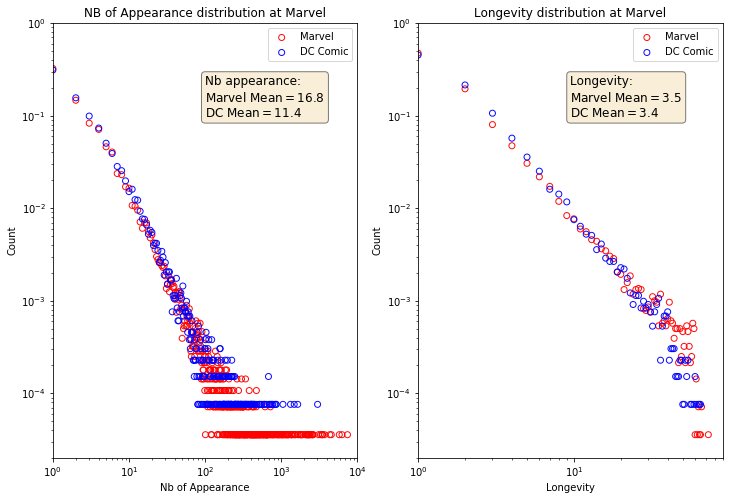

In [259]:
fig, axs = plt.subplots(1,2, figsize=(12,8))
#h, bins,_ = plt.hist(marvel_pers['Number_of_apparitions'],bins=10)
nb_bins = 100
logbins = np.logspace(np.log10(1),np.log10(max(marvel_pers['Number_of_apparitions'])),nb_bins)
marvel_app = marvel_pers['Number_of_apparitions'].value_counts(normalize=True)
dc_app = dc_pers['Number_of_apparitions'].value_counts(normalize=True)
axs[0].scatter(marvel_app.index, marvel_app.values, facecolors='none', edgecolors = 'red', alpha=0.95)
axs[0].scatter(dc_app.index, dc_app.values, facecolors='none', edgecolors = 'blue', alpha=0.95)
#axs[0].hist(marvel_pers['Number_of_apparitions'], color = 'red', bins=logbins, alpha=0.7)
#axs[0].hist(dc_pers['Number_of_apparitions'], color = 'blue', bins=logbins,alpha=0.7)
axs[0].set_title('NB of Appearance distribution at Marvel')
axs[0].set_xlabel('Nb of Appearance')
axs[0].legend(['Marvel','DC Comic'])
axs[0].set_xlim((1,10000))
axs[0].set_ylim((2e-5,1))
axs[0].set_ylabel('Count')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
median_marvel = marvel_pers['Number_of_apparitions'].mean()
median_dc = dc_pers['Number_of_apparitions'].mean()
textstr = '\n'.join((\
    'Nb appearance: \n'\
    r'$\mathrm{Marvel\ Mean}=%.1f$' % (median_marvel, ),\
    r'$\mathrm{DC\ Mean}=%.1f$' % (median_dc, )))       
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[0].text(0.5, 0.88, textstr, transform=axs[0].transAxes, fontsize=12,\
        verticalalignment='top', bbox=props)

nb_bins = 100
logbins = np.logspace(np.log10(1),np.log10(max(marvel_pers['Longevity'])),nb_bins)
marvel_long = marvel_pers['Longevity'].value_counts(normalize=True)
dc_long = dc_pers['Longevity'].value_counts(normalize=True)
axs[1].scatter(marvel_long.index, marvel_long.values, facecolors='none', edgecolors = 'red', alpha=0.95)
axs[1].scatter(dc_long.index, dc_long.values, facecolors='none', edgecolors = 'blue', alpha=0.95)
#axs[1].hist(marvel_pers['Longevity'], color = 'red',bins=logbins, alpha=0.7)
#axs[1].hist(dc_pers['Longevity'], color = 'blue', bins=logbins, alpha=0.7)
axs[1].set_title('Longevity distribution at Marvel')
axs[1].set_xlabel('Longevity')
axs[1].set_ylabel('Count')
axs[1].legend(['Marvel','DC Comic'])
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlim((1,90))
axs[1].set_ylim((2e-5,1))
median_marvel = marvel_pers['Longevity'].mean()
median_dc = dc_pers['Longevity'].mean()
textstr1 = '\n'.join((\
    'Longevity: \n'\
    r'$\mathrm{Marvel\ Mean}=%2.1f$' % (median_marvel, ),\
    r'$\mathrm{DC\ Mean}=%2.1f$' % (median_dc, )))       
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[1].text(0.5, 0.88, textstr1, transform=axs[1].transAxes, fontsize=12,\
        verticalalignment='top', bbox=props)

fig.show()
plt.savefig('img/longevity/histogram_appareace_longevity.png')

***We see that the distribution really follows power laws. So for famousity, we could take the mean of the normalized logarithm, i.e:***
$$\text{Famous} = \frac{\frac{\log(\text{longevity})}{\max(\log(\text{longevity}))}+\frac{\log(\text{Appearance})}{\max(\log(\text{Appearance}))}}{2}$$

In [260]:
marvel_pers['Famous']=(np.log(marvel_pers['Number_of_apparitions'])/max(np.log(marvel_pers['Number_of_apparitions']))+np.log(marvel_pers['Longevity'])/max(np.log(marvel_pers['Longevity'])))/2
dc_pers['Famous']=(np.log(dc_pers['Number_of_apparitions'])/max(np.log(dc_pers['Number_of_apparitions']))+np.log(dc_pers['Longevity'])/max(np.log(dc_pers['Longevity'])))/2

/Users/jordanmetz/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [261]:
#Top 10 famous character at Marvel
marvel_pers.sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

Real Name     Current Alias
24326                   Steven "Steve" Rogers   Captain America
20183                   Peter Benjamin Parker        Spider-Man
1290              Anthony Edward "Tony" Stark          Iron Man
25251                            Thor Odinson   All-Father Thor
21335                           Reed Richards  Mister Fantastic
2576               Benjamin Jacob "Ben" Grimm         The Thing
3444                      Robert Bruce Banner              Hulk
18466                          Namor McKenzie       Sub-Mariner
13168  Jonathan Lowell Spencer "Johnny" Storm       Human Torch
22813                           Scott Summers           Cyclops

In [262]:
#Top 10 famous character at DC
dc_pers.sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

Real Name      Current Alias
5892   Kal-El (birth name);Clark Kent (legal name)           Superman
1507                                   Bruce Wayne             Batman
4193                           Harold "Hal" Jordan      Green Lantern
4665                                  J'onn J'onzz  Martian Manhunter
8349                                          Orin            Aquaman
1198               Bartholomew Henry "Barry" Allen          The Flash
329                     Alan Ladd Wellington Scott      Green Lantern
5082                     Jason Peter "Jay" Garrick          The Flash
11244                 Wallace Rudolph "Wally" West          The Flash
1664                                   Bruce Wayne             Batman

***It looks to work, since we find the top of the two list + the ones that are in both list. Let's check, if this techniques for both good and bad character, and see if we recognize them***

In [263]:
#10 most famous GOOD character at MARVEL
marvel_pers[marvel_pers['Behavior']=='Good'].sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

Real Name     Current Alias
24326                   Steven "Steve" Rogers   Captain America
20183                   Peter Benjamin Parker        Spider-Man
1290              Anthony Edward "Tony" Stark          Iron Man
25251                            Thor Odinson   All-Father Thor
21335                           Reed Richards  Mister Fantastic
2576               Benjamin Jacob "Ben" Grimm         The Thing
3444                      Robert Bruce Banner              Hulk
18466                          Namor McKenzie       Sub-Mariner
13168  Jonathan Lowell Spencer "Johnny" Storm       Human Torch
22813                           Scott Summers           Cyclops

In [264]:
#10 most famous bad character at MARVEL
marvel_pers[marvel_pers['Behavior']=='Bad'].sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

Real Name      Current Alias
15373                                     Loki Laufeyson            Unknown
27216                                  Wilson Grant Fisk            Kingpin
12750                                      Johann Shmidt          Red Skull
27138                                      William Baker            Sandman
17383                                           Mephisto            Unknown
210                                        Adrian Toomes            Vulture
23079  Sergei Nikolaevich Kravinoff (originally Serge...  Kraven the Hunter
3614                                          Cain Marko         Juggernaut
26666                                       Vlad Dracula            Dracula
874                                                Amora        Enchantress

In [265]:
#10 most famous good character at DC COMICS
dc_pers[dc_pers['Behavior']=='Good'].sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

Real Name      Current Alias
5892   Kal-El (birth name);Clark Kent (legal name)           Superman
1507                                   Bruce Wayne             Batman
4193                           Harold "Hal" Jordan      Green Lantern
4665                                  J'onn J'onzz  Martian Manhunter
8349                                          Orin            Aquaman
1198               Bartholomew Henry "Barry" Allen          The Flash
329                     Alan Ladd Wellington Scott      Green Lantern
5082                     Jason Peter "Jay" Garrick          The Flash
11244                 Wallace Rudolph "Wally" West          The Flash
1664                                   Bruce Wayne             Batman

In [266]:
#10 most famous good character at DC COMICS
dc_pers[dc_pers['Behavior']=='Bad'].sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

Real Name      Current Alias
11996   Alexander Joseph Luthor         Lex Luthor
21533                      Uxas           Darkseid
12161             Alexis Luthor         Lex Luthor
16602                   Unknown          The Joker
15259  George "Digger" Harkness  Captain Boomerang
15635               Harvey Dent           Two-Face
11874              Adolf Hitler       Adolf Hitler
21182            Thaal Sinestro           Sinestro
15557                     Grodd      Gorilla Grodd
21467             Vandar Adg II      Vandal Savage

Calculate the score in longevity, apparition and famousity out of 100

In [267]:
marvel_pers['Score appearance'] = np.log(marvel_pers['Number_of_apparitions'])/max(np.log(marvel_pers['Number_of_apparitions']))*100
marvel_pers['Score longevity'] = np.log(marvel_pers['Longevity'])/max(np.log(marvel_pers['Longevity']))*100
marvel_pers['Score Famous'] = 100*marvel_pers['Famous']
dc_pers['Score appearance'] = np.log(dc_pers['Number_of_apparitions'])/max(np.log(dc_pers['Number_of_apparitions']))*100
dc_pers['Score longevity'] = np.log(dc_pers['Longevity'])/max(np.log(dc_pers['Longevity']))*100
dc_pers['Score Famous'] = 100*dc_pers['Famous']

### Appearance over the years

/Users/jordanmetz/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


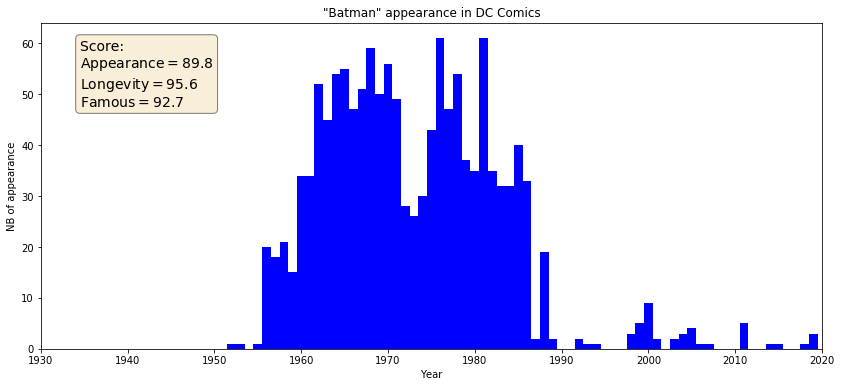

In [268]:
def plot_longevity(category, name):
    n = 0
    k = 0
    is_ = np.empty(2)
    activity = pd.Series([])
    try:
        if len(marvel_pers[marvel_pers[category]==name]['years'])==True:
            print(3)
            activity[k] = pd.Series(marvel_pers[marvel_pers[category]==name]['years'].values[0]).value_counts()
            print(2)
            appearance = marvel_pers[marvel_pers[category]==name]['Score appearance'].values[0]
            print(1)
            longevity = marvel_pers[marvel_pers[category]==name]['Score longevity'].values[0]
            famous = marvel_pers[marvel_pers[category]==name]['Score Famous'].values[0]    
        else:
            activity[k] = pd.Series(marvel_pers[marvel_pers[category]==name].sort_values(by='Score Famous',ascending=False)['years'].values[0]).value_counts()
            appearance = marvel_pers[marvel_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score appearance'].values[0]
            longevity = marvel_pers[marvel_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score longevity'].values[0]
            famous = marvel_pers[marvel_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score Famous'].values[0]   
        is_[n] = 1
        k += 1
    except:
        is_[n] = 0
    n+=1
    try:
        if len(dc_pers[dc_pers[category]==nom]['years'])==True:
            activity[k] = pd.Series(dc_pers[dc_pers[category]==name]['years'].values[0]).value_counts()
            appearance = dc_pers[dc_pers[category]==name]['Score appearance'].values[0]
            longevity = dc_pers[dc_pers[category]==name]['Score longevity'].values[0]
            famous = dc_pers[dc_pers[category]==name]['Score Famous'].values[0]  
        else:
            activity[k] = pd.Series(dc_pers[dc_pers[category]==name].sort_values(by='Score Famous',ascending=False)['years'].values[0]).value_counts()
            appearance = dc_pers[dc_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score appearance'].values[0]
            longevity = dc_pers[dc_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score longevity'].values[0]
            famous = dc_pers[dc_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score Famous'].values[0]   
        is_[n] = 1
        k += 1
    except:
        is_[n] = 0
    n+=1
    fig, axs = plt.subplots(1,1,figsize=(14,k*6))
    l = 0
    for j in range(2):
        if is_[j]:
            if j==0:
                axs.bar(x = activity[l].index, height = activity[l], width = 1, color='red')
            else:
                axs.bar(x = activity[l].index, height = activity[l], width = 1, color='blue')
            axs.set_xlabel('Year')
            axs.set_ylabel('NB of appearance')
            axs.set_xlim(1930,2020)
            if j == 0:
                axs.set_title('"'+name + '" appearance in Marvel Comics')
            else:
                axs.set_title('"'+name + '" appearance in DC Comics')
            l+=1
    textstr = '\n'.join((\
    'Score: \n'\
    r'$\mathrm{Appearance}=%.1f$' % (appearance, ),\
    r'$\mathrm{Longevity}=%.1f$' % (longevity, ),\
    r'$\mathrm{Famous}=%.1f$' % (famous, )))        
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,\
        verticalalignment='top', bbox=props)
    fig.show()
    plt.savefig('img/longevity/pers_'+name+'.png')

plot_longevity('Current Alias','Batman')

In [269]:
dc_pers[dc_pers['Current Alias']=='Batman'].sort_values(by='Score Famous',ascending=False)

URL                  Real Name  \
1507              wiki/Bruce_Wayne_(Earth-One)                Bruce Wayne   
1664              wiki/Bruce_Wayne_(New_Earth)                Bruce Wayne   
1465              wiki/Bruce_Wayne_(Earth-Two)                Bruce Wayne   
1502                   wiki/Bruce_Wayne_(DCAU)         Bruce Thomas Wayne   
10508            wiki/Terrence_McGinnis_(DCAU)  Terrence "Terry" McGinnis   
...                                        ...                        ...   
1551              wiki/Bruce_Wayne_(Earth-172)                Bruce Wayne   
2557   wiki/Damian_Wayne_(Batman_in_Bethlehem)               Damian Wayne   
3161         wiki/Eliot_Ness_(Scar_of_the_Bat)                 Eliot Ness   
4878    wiki/James_Gordon_II_(Digital_Justice)            James Gordon II   
268           wiki/Alexander_Luthor_(Earth_32)           Alexander Luthor   

              Identity Current Alias Citizenship Good or Bad Marital Status  \
1507   Secret Identity        Batman    American        Good         Single   
1664   Secret Identity        Batman    American        Good         Single   
1465   Secret Identity        Batman    American        Good        Widowed   
1502   Secret Identity        Batman    American        Good        Widowed   
10508  Secret Identity        Batman    American        Good        Engaged   
...                ...           ...         ...         ...            ...   
1551   Secret Identity        Batman    American        Good         Single   
2557   Secret Identity        Batman    American        Good         Single   
3161           Unknown        Batman    American        Good        Unknown   
4878   Secret Identity        Batman    American        Good         Single   
268    Secret Identity        Batman    American        Good         Single   

                                   Occupation Education Gender  ... Behavior  \
1507                              Businessman   Unknown   Male  ...     Good   
1664   Businessman, Vigilante and Adventurer.   Unknown   Male  ...     Good   
1465          Detective · Police Commissioner   Unknown   Male  ...     Good   
1502                              Businessman   Unknown   Male  ...     Good   
10508                                 Unknown   Unknown   Male  ...     Good   
...                                       ...       ...    ...  ...      ...   
1551                            Crime Fighter   Unknown   Male  ...     Good   
2557                                  Unknown   Unknown   Male  ...  Neutral   
3161                         Government Agent   Unknown   Male  ...     Good   
4878                       Detective Sergeant   Unknown   Male  ...     Good   
268                                 Vigilante   Unknown   Male  ...     Good   

      Number_of_apparitions  \
1507                   1326   
1664                   1482   
1465                    374   
1502                     94   
10508                    41   
...                     ...   
1551                      1   
2557                      1   
3161                      1   
4878                      1   
268                       1   

                                             DatesString  \
1507   December, 1964,December, 1964,December, 1964,M...   
1664   January, 2008,May, 2005,December, 2001,June, 2...   
1465   1953,1953,December, 1964,December, 1964,Decemb...   
1502   April, 1997,September, 1998,August, 1998,2000,...   
10508  2000,2000,March, 1999,May, 1999,October, 2000,...   
...                                                  ...   
1551                                      December, 1967   
2557                                         March, 2011   
3161                                                1996   
4878                                      February, 1990   
268                                       November, 2019   

                                                   years First_apparition  \
1507   [1964, 1964, 1964, 1965, 1965,

***Apparently, there are many Batman, that's why the longevity score of batman is so bad.
Should we merge them???***

***NOTE: It is important to know that a character can appear many times in the dataset, if, for example, the character appeared in other version of the earth, or appeared with different characteristic. 
    Hence, for this part, we will combine all character under the same alias.***

In [270]:
def merge_alias(df):
    new_df = df.sort_values(by='Score Famous', ascending=False).groupby('Current Alias').first()
    new_df['years'] = df.sort_values(by='Score Famous', ascending=False).groupby('Current Alias')['years'].sum()
    new_df['Number_of_apparitions'] = df.sort_values(by='Score Famous', ascending=False).groupby('Current Alias')['Number_of_apparitions'].sum()
    new_df['First_apparition'] = df.sort_values(by='Score Famous', ascending=False).groupby('Current Alias')['First_apparition'].min()
    new_df.drop('Unknown',inplace=True)
    new_df = new_df.reset_index()
    new_df['Longevity'] = new_df['years'].apply(lambda year: len(list(set(year))))
    new_df['Famous']=(np.log(new_df['Number_of_apparitions'])/max(np.log(new_df['Number_of_apparitions']))+np.log(new_df['Longevity'])/max(np.log(new_df['Longevity'])))/2
    new_df['Score appearance'] = np.log(new_df['Number_of_apparitions'])/max(np.log(new_df['Number_of_apparitions']))*100
    new_df['Score longevity'] = np.log(new_df['Longevity'])/max(np.log(new_df['Longevity']))*100
    new_df['Score Famous'] = 100*new_df['Famous']
    return new_df

marvel_alias = merge_alias(marvel_pers)
dc_alias = merge_alias(dc_pers)

/Users/jordanmetz/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


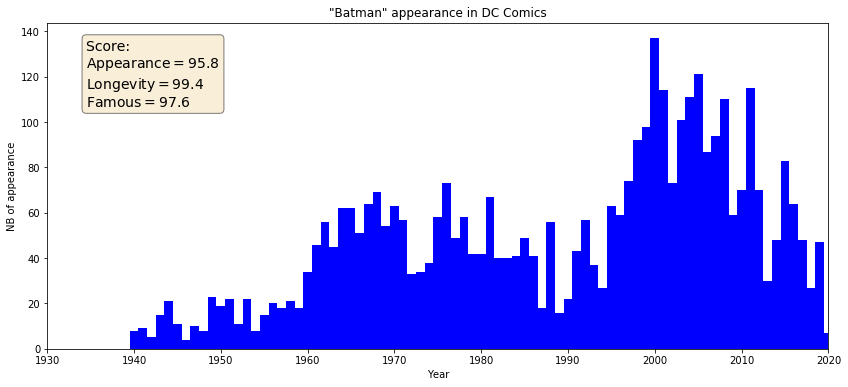

In [271]:
def plot_longevity(category, name):
    n = 0
    k = 0
    is_ = np.empty(2)
    activity = pd.Series([])
    try:
        if len(marvel_alias[marvel_alias[category]==name]['years'])==True:
            print(3)
            activity[k] = pd.Series(marvel_alias[marvel_alias[category]==name]['years'].values[0]).value_counts()
            print(2)
            appearance = marvel_alias[marvel_alias[category]==name]['Score appearance'].values[0]
            print(1)
            longevity = marvel_alias[marvel_alias[category]==name]['Score longevity'].values[0]
            famous = marvel_alias[marvel_alias[category]==name]['Score Famous'].values[0]    
        else:
            activity[k] = pd.Series(marvel_alias[marvel_alias[category]==name].sort_values(by='Score Famous',ascending=False)['years'].values[0]).value_counts()
            appearance = marvel_alias[marvel_alias[category]==name].sort_values(by='Score Famous',ascending=False)['Score appearance'].values[0]
            longevity = marvel_alias[marvel_alias[category]==name].sort_values(by='Score Famous',ascending=False)['Score longevity'].values[0]
            famous = marvel_alias[marvel_alias[category]==name].sort_values(by='Score Famous',ascending=False)['Score Famous'].values[0]   
        is_[n] = 1
        k += 1
    except:
        is_[n] = 0
    n+=1
    try:
        if len(dc_alias[dc_alias[category]==nom]['years'])==True:
            activity[k] = pd.Series(dc_alias[dc_alias[category]==name]['years'].values[0]).value_counts()
            appearance = dc_alias[dc_alias[category]==name]['Score appearance'].values[0]
            longevity = dc_alias[dc_alias[category]==name]['Score longevity'].values[0]
            famous = dc_alias[dc_alias[category]==name]['Score Famous'].values[0]  
        else:
            activity[k] = pd.Series(dc_alias[dc_alias[category]==name].sort_values(by='Score Famous',ascending=False)['years'].values[0]).value_counts()
            appearance = dc_alias[dc_alias[category]==name].sort_values(by='Score Famous',ascending=False)['Score appearance'].values[0]
            longevity = dc_alias[dc_alias[category]==name].sort_values(by='Score Famous',ascending=False)['Score longevity'].values[0]
            famous = dc_alias[dc_alias[category]==name].sort_values(by='Score Famous',ascending=False)['Score Famous'].values[0]   
        is_[n] = 1
        k += 1
    except:
        is_[n] = 0
    n+=1
    fig, axs = plt.subplots(1,1,figsize=(14,k*6))
    l = 0
    for j in range(2):
        if is_[j]:
            if j==0:
                axs.bar(x = activity[l].index, height = activity[l], width = 1, color='red')
            else:
                axs.bar(x = activity[l].index, height = activity[l], width = 1, color='blue')
            axs.set_xlabel('Year')
            axs.set_ylabel('NB of appearance')
            axs.set_xlim(1930,2020)
            if j == 0:
                axs.set_title('"'+name + '" appearance in Marvel Comics')
            else:
                axs.set_title('"'+name + '" appearance in DC Comics')
            l+=1
    textstr = '\n'.join((\
    'Score: \n'\
    r'$\mathrm{Appearance}=%.1f$' % (appearance, ),\
    r'$\mathrm{Longevity}=%.1f$' % (longevity, ),\
    r'$\mathrm{Famous}=%.1f$' % (famous, )))        
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,\
        verticalalignment='top', bbox=props)
    fig.show()
    plt.savefig('img/longevity/alias_'+name+'.png')

plot_longevity('Current Alias','Batman')

In [272]:
dc_alias[dc_alias['Current Alias']=='Batman'].sort_values(by='Score Famous',ascending=False)

Current Alias                           URL    Real Name         Identity  \
474        Batman  wiki/Bruce_Wayne_(Earth-One)  Bruce Wayne  Secret Identity   

    Citizenship Good or Bad Marital Status   Occupation Education Gender  ...  \
474    American        Good         Single  Businessman   Unknown   Male  ...   

    Behavior Number_of_apparitions  \
474     Good                  3952   

                                           DatesString  \
474  December, 1964,December, 1964,December, 1964,M...   

                                                 years First_apparition  \
474  [1964, 1964, 1964, 1965, 1965, 1965, 1965, 196...           1940.0   

    Longevity    Famous Score appearance  Score longevity  Score Famous  
474        81  0.976241        95.800127        99.448012      97.62407  

[1 rows x 33 columns]

***The problem seems resolved.
Let's check the most famous if they are the same***

In [273]:
marvel_alias.sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

Real Name     Current Alias
1427                   Steven "Steve" Rogers   Captain America
8417                   Peter Benjamin Parker        Spider-Man
4161  Jonathan Lowell Spencer "Johnny" Storm       Human Torch
4334             Anthony Edward "Tony" Stark          Iron Man
297                             Thor Odinson   All-Father Thor
6012                           Reed Richards  Mister Fantastic
4150                     Robert Bruce Banner              Hulk
9050              Benjamin Jacob "Ben" Grimm         The Thing
8629                          Namor McKenzie       Sub-Mariner
2089                           Scott Summers           Cyclops

In [274]:
# check most famous
dc_alias.sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

Real Name        Current Alias
5638  Kal-El (birth name);Clark Kent (legal name)             Superman
474                                   Bruce Wayne               Batman
2472                          Harold "Hal" Jordan        Green Lantern
5879              Bartholomew Henry "Barry" Allen            The Flash
6549                          Diana of Themyscira         Wonder Woman
3476                                    Lois Lane            Lois Lane
4262                       Richard "Dick" Grayson            Nightwing
1294                              James W. Gordon  Commissioner Gordon
2465                   Oliver Jonas "Ollie" Queen          Green Arrow
2972                      James Bartholomew Olsen          Jimmy Olsen

***We see that the order is different, but the people are roughly the same***

Just check the distribution of the score

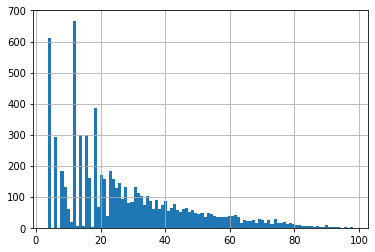

In [275]:
marvel_alias[marvel_alias['Score Famous']>0]['Score Famous'].hist(bins=100)

***We are going to merge the two dataframe and analyse them together in order to determine the factor of famousity of a character. For this, we will keep all the occurence for each alias, so we can determine which part of them, which attributes as more chance to stay longer***

In [277]:
#add a tag to know where they are from
marvel_pers['Comic'] = 'Marvel'
dc_pers['Comic'] = 'DC'


In [278]:
marvel_pers.columns

Index(['URL', 'Real Name', 'Identity', 'Current Alias', 'Citizenship',
       'Marital Status', 'Occupation', 'Education', 'Gender', 'Height',
       'Weight', 'Eyes', 'Hair', 'Place of Birth', 'Height in string',
       'Height in float', 'Weight in string', 'Weight in float', 'Good_count',
       'Bad_count', 'Neutral_count', 'Dates', 'Behavior',
       'Number_of_apparitions', 'DatesString', 'years', 'First_apparition',
       'Longevity', 'Famous', 'Score appearance', 'Score longevity',
       'Score Famous', 'Comic'],
      dtype='object')

In [279]:
dc_pers.columns

Index(['URL', 'Real Name', 'Identity', 'Current Alias', 'Citizenship',
       'Good or Bad', 'Marital Status', 'Occupation', 'Education', 'Gender',
       'Height', 'Weight', 'Eyes', 'Hair', 'Place of Birth',
       'Height in string', 'Height in float', 'Weight in string',
       'Weight in float', 'Good_count', 'Bad_count', 'Neutral_count', 'Dates',
       'Behavior', 'Number_of_apparitions', 'DatesString', 'years',
       'First_apparition', 'Longevity', 'Famous', 'Score appearance',
       'Score longevity', 'Score Famous', 'Comic'],
      dtype='object')

In [348]:
attribute = ['URL', 'Real Name', 'Current Alias', 'Comic', 'Identity', 'Citizenship', 'Marital Status',\
            'Occupation', 'Education', 'Gender', 'Height in float', 'Weight in float', 'Eyes', 'Hair',\
            'Place of Birth','Behavior',\
            'Number_of_apparitions', 'years', 'First_apparition', 'Longevity', 'Score appearance',\
            'Score longevity', 'Score Famous']

In [349]:
pers = pd.concat([marvel_pers[attribute],dc_pers[attribute]],axis=0)

In [350]:
pers.rename(inplace=True, columns={'Height in float':'Height', 'Weight in float':'Weight',\
                                   'Number_of_apparitions':'Nb appearance','years':'Years',\
                                   'First_apparition':'First appearance', })

we will seperate the dataset in 3 groups and analyse there attributes. The split is done as followed

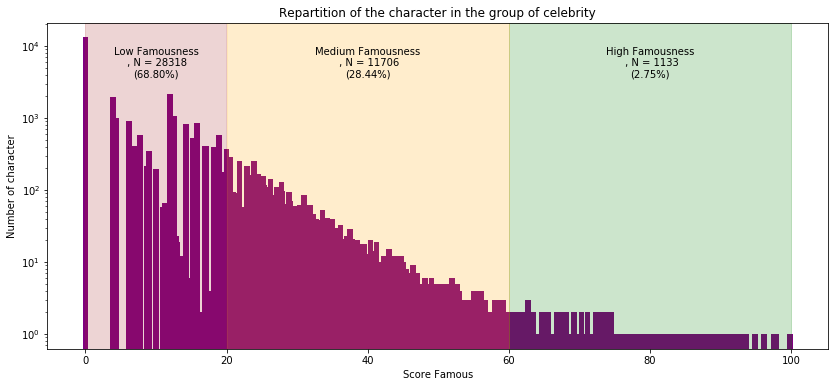

In [351]:
pers_score = pers['Score Famous'].value_counts()
pers_high = len(pers[pers['Score Famous']>60])
pers_med = len(pers[(pers['Score Famous']<=60)&(pers['Score Famous']>20)])
pers_low = len(pers[pers['Score Famous']<=20])
total = len(pers['Score Famous'])

fig, axs = plt.subplots(1,1,figsize=(14,6))
axs.bar(pers_score.index, pers_score.values, color='purple')
axs.axvspan(60, 100, alpha=0.2, color='green')
axs.axvspan(20.1, 60, alpha=0.2, color='orange')
axs.axvspan(0, 19.9, alpha=0.2, color='brown')
axs.set_xlabel('Score Famous')
axs.set_ylabel('Number of character')
axs.set_title('Repartition of the character in the group of celebrity')
axs.set_yscale('log')
s = "Low Famousness\n , N = %d\n(%.2f%%)" % (pers_low,pers_low/total*100 )
axs.text(10,1e4,s,ha='center', va='top')
s = "Medium Famousness\n , N = %d\n(%.2f%%)" % (pers_med,pers_med/total*100)
axs.text(40,1e4,s,ha='center', va='top')
s = "High Famousness\n , N = %d\n(%.2f%%)" % (pers_high,pers_high/total*100)
axs.text(80,1e4,s,ha='center', va='top');
plt.savefig('img/longevity/repartition.png')

## What does a famous character look like, and what is unfamous?
_(For this part, I take the job of Pilou and modify it)_

In [352]:
pers_high=pers[pers['Score Famous']>60]
pers_med = pers[(pers['Score Famous']<=60)&(pers['Score Famous']>20)]
pers_low = pers[pers['Score Famous']<=20]

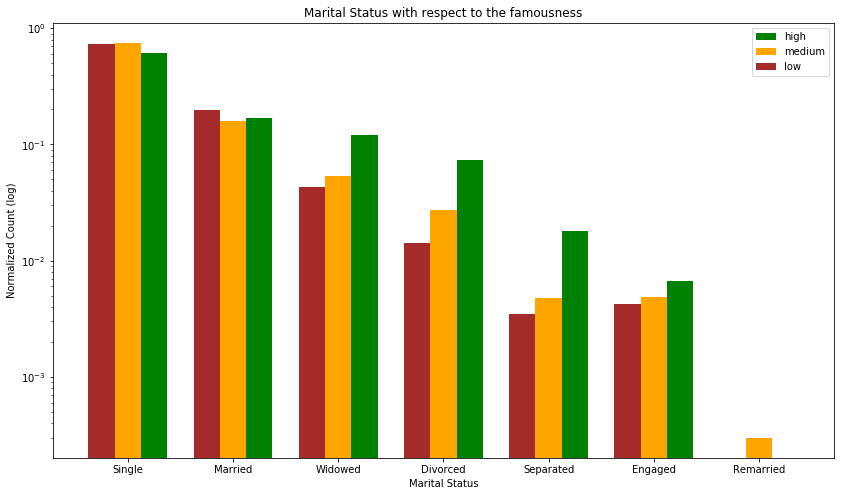

In [353]:
#We normalize the count with the number of characters in every category in order to have a fair comparison
marital_status_high = pd.DataFrame(pers_high["Marital Status"].drop(index=pers_high[pers_high["Marital Status"]=='Unknown'].index).value_counts(normalize=True))
marital_status_high.columns = ['high_count']
marital_status_low = pd.DataFrame(pers_low["Marital Status"].drop(index=pers_low[pers_low["Marital Status"]=='Unknown'].index).value_counts(normalize=True))
marital_status_low.columns = ['low_count']
marital_status_med = pd.DataFrame(pers_med["Marital Status"].drop(index=pers_med[pers_med["Marital Status"]=='Unknown'].index).value_counts(normalize=True))
marital_status_med.columns = ['med_count']
dfList = [marital_status_high, marital_status_low, marital_status_med]
#dfs = [df.set_index(marital_status_high.index) for df in dfList]
marital_status = pd.concat(dfList, axis=1, join='outer', sort=True)\
                   .fillna(0)
marital_status = marital_status.sort_values(by='high_count', ascending=False)

fig, axs = plt.subplots(1, 1, figsize=(14,8))
X = np.arange(len(marital_status))
axs.bar(X+0.25, height = marital_status['high_count'], width=0.25, color='green', label='high',alpha=1);
axs.bar(X, height = marital_status['med_count'],  width=0.25, color='orange', label='medium',alpha=1);
axs.bar(X-0.25, height = marital_status['low_count'],  width=0.25, color='brown', label='low',alpha=1);
axs.set_title('Marital Status with respect to the famousness')
axs.set_xlabel('Marital Status')
axs.set_xticklabels([''] + list(marital_status.index))
axs.set_ylabel('Normalized Count (log)')
axs.set_yscale('log')
plt.legend()
plt.savefig('img/longevity/marital_status.png')

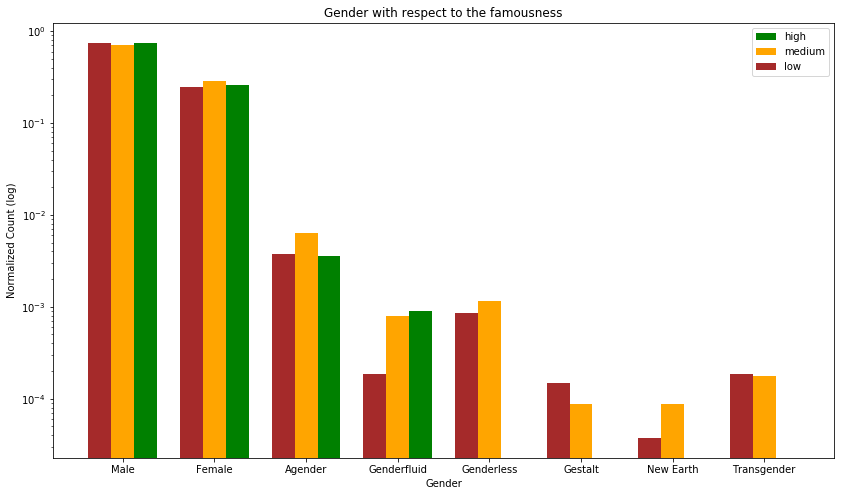

In [354]:
#We normalize the count with the number of characters in every category in order to have a fair comparison
gender_high = pd.DataFrame(pers_high["Gender"].drop(index=pers_high[pers_high["Gender"]=='Unknown'].index).value_counts(normalize=True))
gender_high.columns = ['high_count']
gender_low = pd.DataFrame(pers_low["Gender"].drop(index=pers_low[pers_low["Gender"]=='Unknown'].index).value_counts(normalize=True))
gender_low.columns = ['low_count']
gender_med = pd.DataFrame(pers_med["Gender"].drop(index=pers_med[pers_med["Gender"]=='Unknown'].index).value_counts(normalize=True))
gender_med.columns = ['med_count']
dfList = [gender_high, gender_low, gender_med]
gender = pd.concat(dfList, axis=1, join='outer', sort=True)\
                   .fillna(0)
gender = gender.sort_values(by='high_count', ascending=False)

fig, axs = plt.subplots(1, 1, figsize=(14,8))
X = np.arange(len(gender))
axs.bar(X+0.25, height = gender['high_count'], width=0.25, color='green', label='high');
axs.bar(X, height = gender['med_count'],  width=0.25, color='orange', label='medium');
axs.bar(X-0.25, height = gender['low_count'],  width=0.25, color='brown', label='low');
axs.set_title('Gender with respect to the famousness')
axs.set_xlabel('Gender')
axs.set_xticklabels([''] + list(gender.index))
axs.set_ylabel('Normalized Count (log)')
axs.set_yscale('log')
plt.legend()
plt.savefig('img/longevity/gender.png')

***Transgender are quite new, that's why there have low rank in famousness***

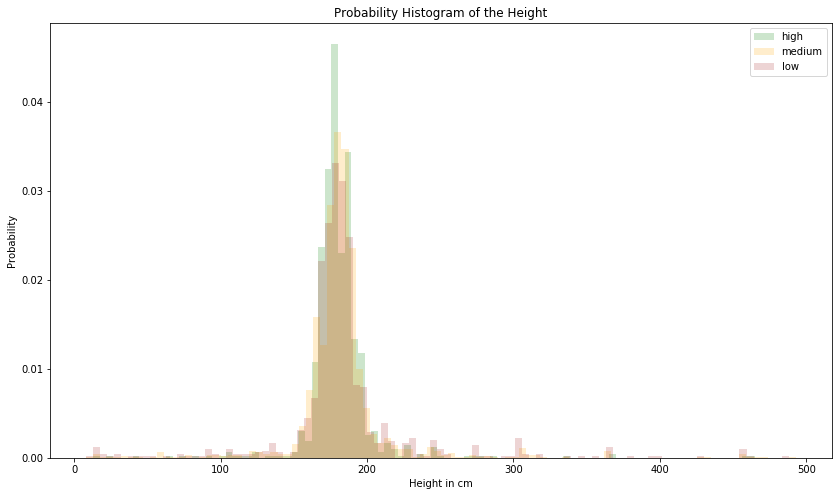

In [355]:
height_high = pers_high[(pers_high["Height"]!=np.nan)\
                          &(pers_high["Height"]<500)]['Height']
height_low = pers_low[(pers_low["Height"]!=np.nan)\
                          &(pers_low["Height"]<500)]['Height']
height_med = pers_med[(pers_med["Height"]!=np.nan)\
                                &(pers_med["Height"]<500)]['Height']

fig, axs = plt.subplots(1, 1, figsize=(14,8))
# To rectify the dominant class and still maintain the separateness of the distributions we normalize it by setting 
# density=True and stacked=True. By doing so, the total area under each distribution becomes 1.
kwargs = dict(alpha=0.2, bins=100, density=True, stacked=True)

axs.hist(height_high, **kwargs, color='green', label='high')
axs.hist(height_med, **kwargs, color='orange', label='medium')
axs.hist(height_low, **kwargs, color='brown', label='low')

axs.set_title('Probability Histogram of the Height')
axs.set_xlabel('Height in cm')
axs.set_ylabel('Probability')
plt.legend();
plt.savefig('img/longevity/height.png')

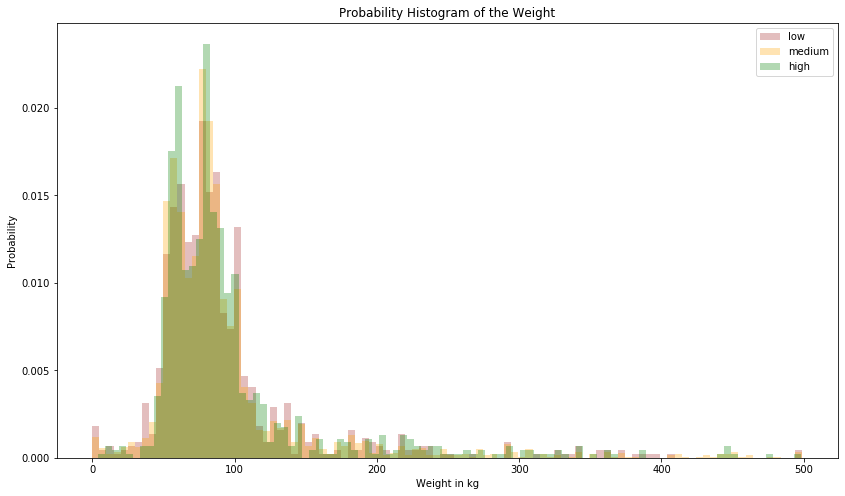

In [356]:
weight_high = pers_high[(pers_high["Weight"]!=np.nan)\
                          &(pers_high["Weight"]<500)]['Weight']
weight_low = pers_low[(pers_low["Weight"]!=np.nan)\
                          &(pers_low["Weight"]<500)]['Weight']
weight_med = pers_med[(pers_med["Weight"]!=np.nan)\
                                &(pers_med["Weight"]<500)]['Weight']

fig, axs = plt.subplots(1, 1, figsize=(14,8))
# To rectify the dominant class and still maintain the separateness of the distributions we normalize it by setting 
# density=True and stacked=True. By doing so, the total area under each distribution becomes 1.
kwargs = dict(alpha=0.3, bins=100, density=True, stacked=True)

axs.hist(weight_low, **kwargs, color='brown', label='low')
axs.hist(weight_med, **kwargs, color='orange', label='medium')
axs.hist(weight_high, **kwargs, color='green', label='high')
axs.set_title('Probability Histogram of the Weight')
axs.set_xlabel('Weight in kg')
axs.set_ylabel('Probability')
plt.legend();
plt.savefig('img/longevity/weight.png')

***There are not many difference. The two picks are the good character, and the bad character***

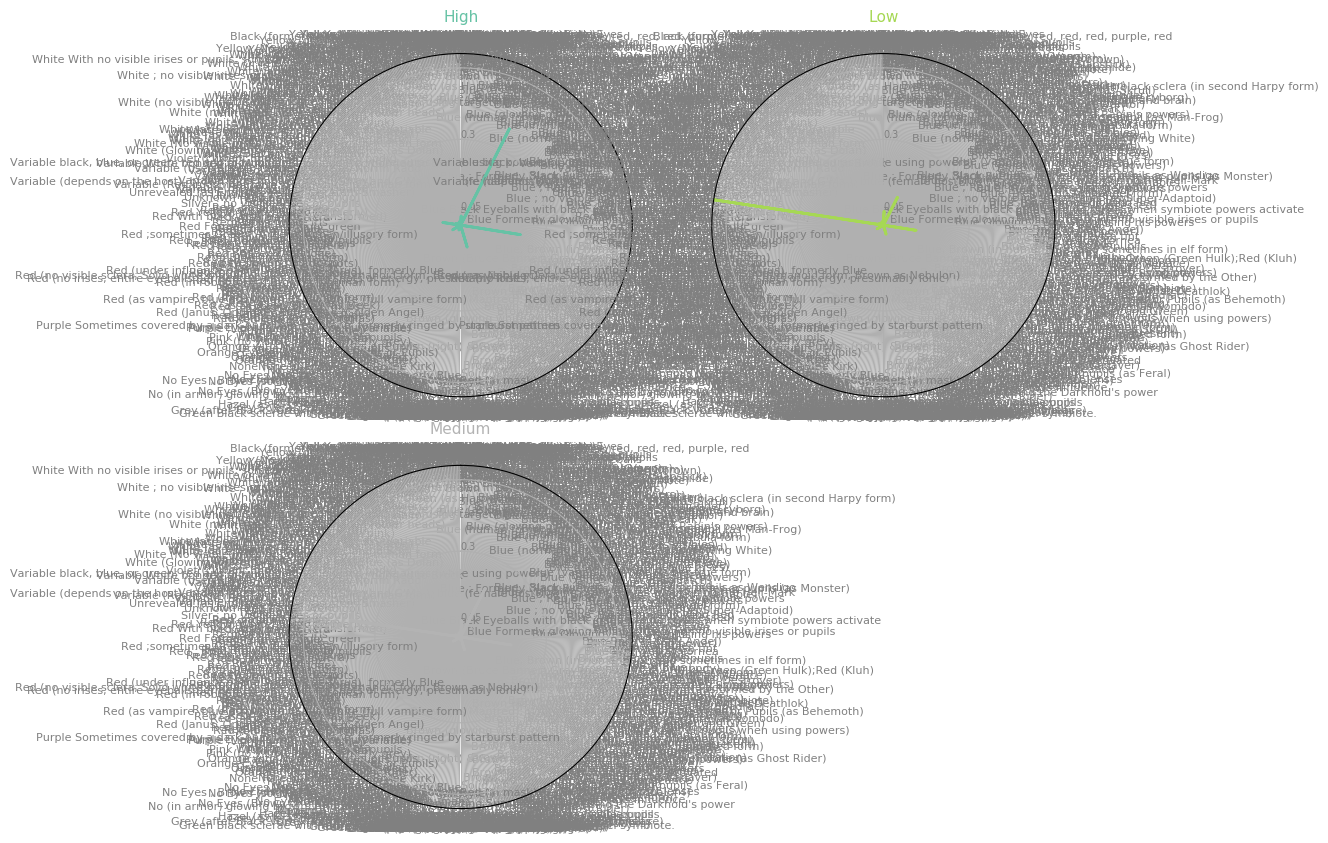

In [359]:
#Top 10 good characthers eyes dataframe
eyes_good_top10 = pd.DataFrame(pers_high['Eyes'].value_counts(normalize=True))
eyes_good_top10 = eyes_good_top10.reset_index()
eyes_good_top10.columns = ['Eyes', 'High']
#Top 10 bad characthers eyes dataframe
eyes_bad_top10 = pd.DataFrame(pers_low['Eyes'].value_counts(normalize=True))
eyes_bad_top10 = eyes_bad_top10.reset_index()
eyes_bad_top10.columns = ['Eyes', 'Low']
#Top 10 neutral characthers eyes dataframe
eyes_neutral_top10 = pd.DataFrame(pers_med['Eyes'].value_counts(normalize=True))
eyes_neutral_top10 = eyes_neutral_top10.reset_index()
eyes_neutral_top10.columns = ['Eyes', 'Medium']
#Join on Eyes
#eyes_neutral_top10.merge(eyes_good_top10,eyes_bad_top10, on='Eyes', how='outer')
dfList = [eyes_good_top10, eyes_bad_top10, eyes_neutral_top10]
dfs = [df.set_index('Eyes') for df in dfList]
eyes = pd.concat(dfs, axis=1, join='outer', sort=True) \
         .fillna(0) 
eyes.T

from math import pi
 
def make_spider(df):
    
    # initialize the figure
    my_dpi=100
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(df.index))

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    for row in range(0, len(df.index)):
        # Initialise the spider plot
        ax = plt.subplot(2,2,row+1, polar=True, )

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories, color='grey', size=8)

        # Draw ylabels
        ax.set_rlabel_position(0)
        list_ = np.round(np.linspace(0+0.05,round(np.max(df.max().values),1)-0.05,3),3)
        plt.yticks(list_, map(str,list_), color="grey", size=7)
        plt.ylim(0,round(np.max(df.max().values),1))

        # Ind1
        values=df.iloc[row].values.flatten().tolist()
        #print(sum(values))
        ax.plot(angles, values, color=my_palette(row), linewidth=2, linestyle='solid')
        ax.fill(angles, values, color=my_palette(row), alpha=0.4)

        # Add a title
        plt.title(df.index[row], size=11, color=my_palette(row), y=1.07)
        plt.savefig('img/longevity/eye.png')
        
make_spider(eyes.T)